##  lesson 2 codes in class review
# first time using the jupyter note book

## inclass priactice

questions answers
1. no such perfect simulation can fix all the data, and complicated formulars difficult to build, machine learning method implment simple formula to simulate data with supervised chage.
2. random chosen of the coefficients cannot improve the simulation results 
3. the 2nd-method is better than random choice, but still not efficient to fit the model
4. because when the dirivative of the formula is negative, simulation loss is small.therefore, try to find the coefficients to make the dirivative negative.
5. gradient is changes of the coefficients in every iteration, and the decent represents the smaller loss in each step.
6. get better results more quickly and no more waste calculation.
7. machine learning: algorithms models, statistical models, no explicit instructions, rely on references

In [3]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [8]:
import re


In [5]:
test = "name:'澳门', geoCoord:[113.54, 22.19]"

In [6]:
pattern = re.compile(r"name:'(\w+)',\sgeoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [7]:
pattern.findall(test)

[('澳门', '113.54', '22.19')]

In [8]:
city_location = {}
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info: continue
    city, long, lan = city_info[0]
    long = float(long)
    lan = float(lan)
    city_location[city] = (long, lan)

In [9]:
print(city_location)

{'沈阳': (123.38, 41.8), '石家庄': (114.48, 38.03), '呼和浩特': (111.65, 40.82), '兰州': (103.73, 36.03), '香港': (114.17, 22.28), '拉萨': (102.73, 25.04), '西宁': (101.74, 36.56), '南京': (118.78, 32.04), '合肥': (117.27, 31.86), '上海': (121.48, 31.22), '贵阳': (106.71, 26.57), '重庆': (106.54, 29.59), '长春': (125.35, 43.88), '南宁': (108.33, 22.84), '西安': (108.95, 34.27), '哈尔滨': (126.63, 45.75), '太原': (112.53, 37.87), '南昌': (115.89, 28.68), '杭州': (120.19, 30.26), '广州': (113.23, 23.16), '嘉峪关': (98.17, 39.47), '乌鲁木齐': (87.68, 43.77), '台湾': (121.3, 25.03), '海口': (110.35, 20.02), '长沙': (113.0, 28.21), '天津': (117.2, 39.13), '成都': (104.06, 30.67), '郑州': (113.65, 34.76), '银川': (106.27, 38.47), '武汉': (114.31, 30.52), '济南': (117.0, 36.65), '澳门': (113.54, 22.19), '福州': (119.3, 26.08), '北京': (116.46, 39.92), '西藏': (91.11, 29.97)}


In [28]:
import math

In [75]:
def geo_distance(origin, destination):
    """
    calculate the harvesing distance
    Parameters
    -------------------
    origin: tuple of float(long ,lan)
    destination: tuple of floar(long, lan)
    
    returns
    -------------------
    distance_in_km : float
    
    examples
    -------------------
    origin = (48.1372, 11.5756) (munich)
    destination = (52.5168, 13.4083) (berlin)
    round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km
    
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat /2) * math.sin(dlat / 2) +
    math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c =2 * math.atan2(math.sqrt(a), math.sqrt(1 -a))
    d = radius * c
    
    return d
         

In [76]:
def get_geo_distance(origin, destination):
    return geo_distance(city_location[origin], city_location[destination])

In [77]:
get_geo_distance('上海','杭州')

153.5185697155768

In [78]:
import networkx as nx

In [79]:
city_graph = nx.Graph()

In [80]:
city_graph.add_nodes_from(list(city_location.keys()))

In [81]:
%matplotlib inline

In [29]:
import matplotlib.pyplot as plt

In [83]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

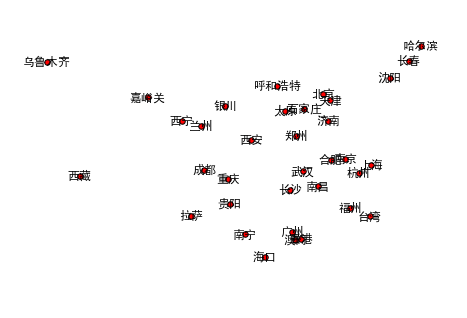

In [84]:
nx.draw(city_graph, city_location, with_labels= True, node_size=30)

In [85]:
threshold = 300 # in km

In [86]:
from collections import defaultdict

In [87]:
city_connection = defaultdict(list)

In [88]:
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2: continue
        distance = get_geo_distance(c1, c2)
        if distance < threshold:
            city_connection[c1].append(c2)
            city_connection[c2].append(c1)

In [89]:
city_connection

defaultdict(list,
            {'上海': ['杭州', '杭州'],
             '兰州': ['西宁', '成都', '银川', '西宁', '成都', '银川'],
             '北京': ['石家庄', '天津', '济南', '石家庄', '天津', '济南'],
             '南京': ['合肥', '杭州', '合肥', '杭州'],
             '南宁': ['贵阳', '贵阳', '海口', '海口'],
             '南昌': ['合肥', '合肥', '武汉', '武汉'],
             '台湾': ['福州', '福州'],
             '合肥': ['南京', '南京', '南昌', '济南', '南昌', '济南'],
             '呼和浩特': ['太原', '太原'],
             '哈尔滨': ['长春', '长春'],
             '天津': ['济南', '北京', '济南', '北京'],
             '太原': ['石家庄', '呼和浩特', '石家庄', '呼和浩特', '郑州', '郑州'],
             '广州': ['香港', '香港', '长沙', '澳门', '长沙', '澳门'],
             '成都': ['兰州', '拉萨', '西宁', '重庆', '兰州', '拉萨', '西宁', '重庆'],
             '拉萨': ['西宁', '成都', '西宁', '成都'],
             '杭州': ['南京', '上海', '南京', '上海', '福州', '福州'],
             '武汉': ['南昌', '长沙', '郑州', '南昌', '长沙', '郑州'],
             '沈阳': ['长春', '长春'],
             '济南': ['石家庄', '合肥', '天津', '石家庄', '合肥', '天津', '北京', '北京'],
             '海口': ['南宁', '南宁'],
         

In [90]:
city_with_route = nx.Graph(city_connection)

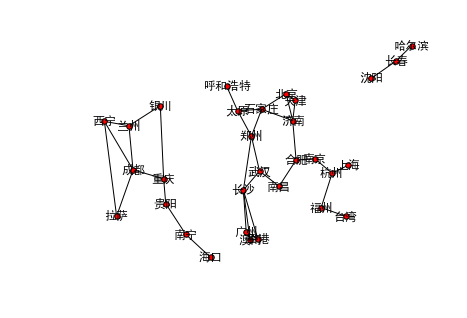

In [91]:
nx.draw(city_with_route, city_location, with_labels=True, node_size=30)

In [92]:
simple_connection_info_src = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}

In [93]:
simple_connection_info = defaultdict(list)

In [94]:
simple_connection_info.update(simple_connection_info_src)

In [95]:
def best_route_search(graph, start):
    visited = [start]
    searched = set()
    
    while visited:
        frontier = visited.pop()
        
        if frontier in searched: continue
        for successor in graph[frontier]:
            if successor in searched: continue
            print(successor)
            
            #visited = visited + [successor]      # depth first search : the last added point has the prime to search
            visited = [successor] + visited      # breadth first search : the privious added point has the prime to search
            
        searched.add(frontier)
    return searched

In [96]:
number_graph = defaultdict(list)
number_graph.update({
    1:[2,3],
    2:[1,4],
    3:[1,5],
    4:[2,6],
    5:[3,7],
    7:[5,8],
})

In [97]:
best_route_search(number_graph, 1)

2
3
4
5
6
7
8


{1, 2, 3, 4, 5, 6, 7, 8}

In [98]:
simple_connection_info['西安']

['兰州', '长沙']

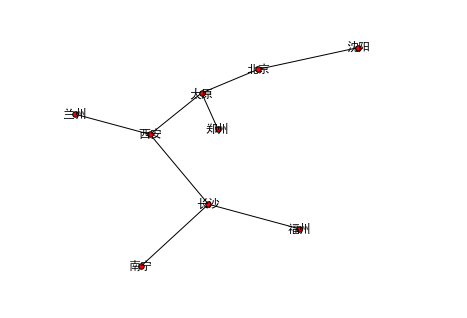

In [99]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True, node_size=30 )

In [103]:
def search(start, destination, connection_graph, sort_candidates):
    pathes = [[start]]
    
    visited = set()
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        
        if frontier in visited: continue
        successors = connection_graph[frontier]
        for city in successors:
            if city in path: continue
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination:
                return new_path
                
        visited.add(frontier)
        pathes = sort_candidates(pathes)
                

In [104]:
def transfer_stations_first(pathes):
    return sorted(pathes, key=len)

In [105]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [106]:
def shortest_path_first(pathes):
    if len(pathes) <= 1: 
        return pathes
    def get_path_distance(path):
        distance = 0
        for i in range(1, len(path)):
            distance += get_geo_distance(path[i -1], path[i])
        return sorted(pathes, key=get_path_distance)

In [107]:
search('兰州', '福州', simple_connection_info, sort_candidates=shortest_path_first)

['兰州', '西安', '长沙', '福州']

In [3]:
import requests

In [4]:
url = 'https://movie.douban.com/subject/26931786/?from=showing'

In [5]:
response = requests.get(url)

In [6]:
what_we_want = r'<a href="https://(movie\.douban\.com/subject/\d+/\?from=subject-page)" class="" '

In [9]:
pattern = re.compile(what_we_want)

In [11]:
likes = pattern.findall(response.text)

In [12]:
for like in likes:
    print(like)

movie.douban.com/subject/24753477/?from=subject-page
movie.douban.com/subject/26100958/?from=subject-page
movie.douban.com/subject/25820460/?from=subject-page
movie.douban.com/subject/1432146/?from=subject-page
movie.douban.com/subject/25937854/?from=subject-page
movie.douban.com/subject/1866473/?from=subject-page
movie.douban.com/subject/25821634/?from=subject-page
movie.douban.com/subject/26213252/?from=subject-page
movie.douban.com/subject/4920389/?from=subject-page
movie.douban.com/subject/3168101/?from=subject-page


##Machine Learning

In [13]:
from sklearn.datasets import load_boston

In [16]:
data = load_boston()

In [17]:
x, y = data['data'], data['target']

In [18]:
x[1]

array([  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
         0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
         7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
         2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
         9.14000000e+00])

In [19]:
y[1]

21.600000000000001

In [20]:
len(x[:, 0])

506

In [21]:
len(y)

506

In [30]:
%matplotlib inline

In [31]:
def draw_rm_and_price():
    plt.scatter(x[:, 5], y)

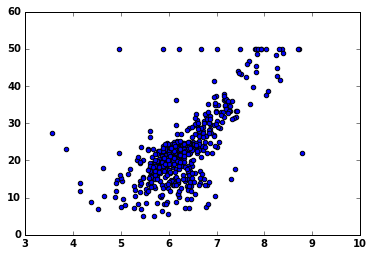

In [32]:
draw_rm_and_price()

In [33]:
import random

In [34]:
def price(rm, a, b):
    return a * rm + b # price function related to the room number

In [35]:
x_rm = x[:, 5]

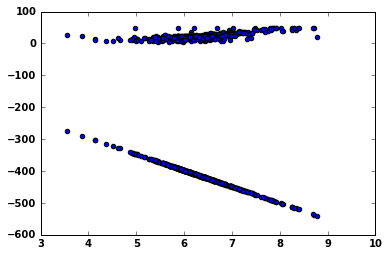

In [38]:
a = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_a_b = [price(r, a, b) for r in x_rm]

draw_rm_and_price()
plt.scatter(x_rm, price_by_random_a_b)

In [39]:
list(y)

[24.0,
 21.600000000000001,
 34.700000000000003,
 33.399999999999999,
 36.200000000000003,
 28.699999999999999,
 22.899999999999999,
 27.100000000000001,
 16.5,
 18.899999999999999,
 15.0,
 18.899999999999999,
 21.699999999999999,
 20.399999999999999,
 18.199999999999999,
 19.899999999999999,
 23.100000000000001,
 17.5,
 20.199999999999999,
 18.199999999999999,
 13.6,
 19.600000000000001,
 15.199999999999999,
 14.5,
 15.6,
 13.9,
 16.600000000000001,
 14.800000000000001,
 18.399999999999999,
 21.0,
 12.699999999999999,
 14.5,
 13.199999999999999,
 13.1,
 13.5,
 18.899999999999999,
 20.0,
 21.0,
 24.699999999999999,
 30.800000000000001,
 34.899999999999999,
 26.600000000000001,
 25.300000000000001,
 24.699999999999999,
 21.199999999999999,
 19.300000000000001,
 20.0,
 16.600000000000001,
 14.4,
 19.399999999999999,
 19.699999999999999,
 20.5,
 25.0,
 23.399999999999999,
 18.899999999999999,
 35.399999999999999,
 24.699999999999999,
 31.600000000000001,
 23.300000000000001,
 19.600000000

# Loss

$$ loss = \cfrac{1}{n}*\sum_{i=0}^{n}{({y}_i - y)}^2$$

In [47]:
def variance_loss(y, y_hat):  # evaluate the pricision of movemonet
    return sum((y_i, y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

#random generate a and b to get best result

In [50]:
variance_loss(y, price_by_random_a_b)

TypeError: unsupported operand type(s) for ** or pow(): 'tuple' and 'int'

In [49]:
trying_times = 2000
min_loss = float('inf')
best_a, best_b = None, None

for i in range(trying_times):
    a = random.random() * 200 - 100
    b = random.random() * 200 -100
    price_by_random_a_b = [price(r, a, b) for r in x[:, 5]]
    
    current_loss = variance_loss(y, price_by_random_a_b)
    if current_loss < min_loss:
        min_loss = current_loss
        best_a, best_b = a, b
        print('when time is {}, get best a is {}, best b is {}, and the loss is {}'.format(i, best_a, best_b, min_loss))

TypeError: unsupported operand type(s) for ** or pow(): 'tuple' and 'int'

In [1]:
import requests

In [2]:
import re

In [3]:
url = "https://map.bjsubway.com"

In [4]:
response = requests.get(url, verify=False)

C:\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py:852: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [5]:
station_no_tran = r'cx="(\d+)"\scy="(\d+)"\s\w+="\d+"\s\w+="([\u4e00-\u9fa5]+)"' 

In [6]:
pattern = re.compile(station_no_tran)

In [10]:
likes = pattern.findall(response.text)

In [11]:
for line in response.text.split('\n'):
    print(line)

<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">
        <meta name="viewport" content="user-scalable=no, width=device-width, initial-scale=1, maximum-scale=1">
        <meta name="csrf-token" content="aY3VFirre9kNNmgYdXuuHsIGZIOa2KRTEfftujhC">

        <title>北京地铁</title>

        <!-- Meta -->
        
        <link rel="stylesheet" href="https://map.bjsubway.com/css/app.css" type="text/css" media="all" />
        <!-- Styles -->
        
        <!-- Check if the language is set to RTL, so apply the RTL layouts -->
        <!-- Otherwise apply the normal LTR layouts -->
        <style type="text/css">
    body {
        overflow: hidden;
        font-family: '黑体';
    }

    .tt-menu {
      width: 296px;
      margin: 12px 0px;
      margin-left: -20px;
      padding: 8px 0;
      background-color: #fff;
      border: 1px solid #ccc;
      border: 1px solid rgba(0, 0, 0, 0.2);
      overflow-y: 

In [12]:
print(likes)

[]


In [2]:
html = '<circle xmlns="http://www.w3.org/2000/svg" id="SvgjsCircle1746" fill="white" stroke="black" stroke-width="1" cx="1000" cy="740" r="4" sdata="中国美术馆" />'

In [5]:
result = re.findall(pattern, html)

In [6]:
result

[('1000', '740', '中国美术馆')]

In [ ]:
<circle xmlns="http://www.w3.org/2000/svg" class="mask" id="SvgjsCircle2960" fill="white" stroke="black" stroke-width="1" cx="363" cy="790" r="4" sdata="八角游乐园" />